<a href="https://colab.research.google.com/github/vish1007/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** - Mohammad Irfan
##### **Team Member 2 -** - Vishal Singh
##### **Team Member 3 -** - Dileep Singh


# **Project Summary -**

Customer Personality Analysis is a comprehensive examination of a company's ideal customers, enabling the business to gain a deeper understanding of its customer base and tailor its products to meet the unique needs, behaviors, and concerns of different customer segments.

By conducting a Customer Personality Analysis, businesses can better identify and target specific customer segments. Instead of spending resources on marketing a new product to every customer in their database, a company can analyze which customer segment is most likely to purchase the product and focus their marketing efforts on that particular segment. This targeted approach can result in more effective marketing campaigns, higher conversion rates, and increased revenue.

The aim of the project is to analyze the transaction data set of a UK-based non-store online retail business specializing in unique all-occasion gifts. Through this analysis, the project seeks to identify various customer segments based on their purchasing behavior, demographics, purchasing frequency, and average spend. The ultimate goal is to gain insights that can aid the business in optimizing its marketing and sales strategies to better serve its customers, leading to increased customer satisfaction and revenue.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Understanding the value of each customer is crucial for any business, and the RFM analysis is a popular method used for this purpose. RFM stands for Recency, Frequency, and Monetary Value, and it is a technique that helps businesses analyze their customers' value based on these three parameters.

By using RFM analysis, businesses can segment their customers into groups based on their recency of purchase, frequency of purchase, and the monetary value of their purchases. The resulting segments can then be ordered from the most valuable customers (those with the highest recency, frequency, and value) to the least valuable customers (those with the lowest recency, frequency, and value).

Customer segmentation is the practice of dividing the customer base into groups of individuals based on common characteristics such as age, gender, interests, and spending habits. By performing customer segmentation using RFM analysis, businesses can gain a deeper understanding of their customers' value and tailor their marketing efforts and product offerings to each segment's unique needs and preferences..**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, time

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
# df=pd.read_csv('/content/drive/MyDrive/online retail/Online Retail.xlsx - Online Retail.csv')

df = pd.read_excel(r'/content/drive/MyDrive/Copy of Online Retail.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 541909
The number of columns in data is 8


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_rows_in_retail_data = df.duplicated().sum()
print('The number of duplicates in retail data is:',duplicate_rows_in_retail_data)

The number of duplicates in retail data is: 5268


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

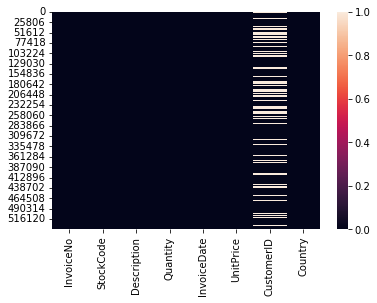

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=True)


### What did you know about your dataset?

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. 
The dataset consists of 541909 rows and 8 columns. However, it is important to note that two of these columns contain missing information. Specifically, the CustomerID column has only 406829 values, indicating that some information is missing. The same is true for the Description column.
When looking at the summary statistics generated by the describe function, it is apparent that some negative values exist in the data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(list(df.columns))

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [ ]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f'The unique values in {col} are {df[col].unique()}' )

The unique values in InvoiceNo are [536365 536366 536367 ... 581585 581586 581587]
The unique values in StockCode are ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
The unique values in Description are ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
The unique values in Quantity are [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144 

## **3. *Data Wrangling***

### Data Wrangling Code

In [ ]:
#Checking the total number of customer id not unique
df.CustomerID.count()

406829

In [ ]:
#Checking number of unique customer id
len(df['CustomerID'].value_counts())

4372

In [ ]:
#checking customer with respect to the country
cust_count =pd.DataFrame(df.groupby(['Country'])['CustomerID'].value_counts(ascending=False))
cust_count

CustomerID
Country        CustomerID            
Australia      12415.0            778
               12431.0            186
               12388.0            100
               12393.0             64
               12434.0             54
...                               ...
United Kingdom 18233.0              1
Unspecified    12743.0            134
               16320.0             56
               14265.0             31
               12363.0             23

[4380 rows x 1 columns]

In [ ]:
#checking number of unique customer with respect to the country
cust_count =pd.DataFrame(df.groupby(['Country'])['CustomerID'].nunique())
cust_count

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


Here we can see that number of unique customer are maximum in United Kingdom

In [ ]:
#checking top country
country_count=df['Country'].value_counts().reset_index()
country_count.rename(columns={'index': 'Country_Name'}, inplace=True)
country_count.rename(columns={'Country': 'Count'}, inplace=True)
country_count.head()

,Country_Name,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


In [ ]:
#Converting object type to datetime for InvoiceDate and checking first and last dates
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
print("Minimum Invoice Date", min(df["InvoiceDate"]))
print("Maximum Invoice Date", max(df["InvoiceDate"]))

Minimum Invoice Date 2010-12-01 08:26:00
Maximum Invoice Date 2011-12-09 12:50:00


In [ ]:
#checking deatils of unit price of products

df["UnitPrice"].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
#lets check any negative price
df[df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Here we can see that there are only two rows which have negative unit price because of Adjust bad debt that is described in description. 

In [ ]:
#removing negative unit price.
df = df[df.UnitPrice >= 0]
df[df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#checking unit price==0
df[df.UnitPrice==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [ ]:
#price==0 % of data 
print("% of data with Price zero: ", round(len(df[df.UnitPrice == 0]) * 100 / len(df),2),"%" )
#lets check how many id associated with unit price=0
print(" total id associated with unit price=0 : ", df[df.UnitPrice==0].CustomerID.nunique())

% of data with Price zero:  0.46 %
 total id associated with unit price=0 :  31


In [ ]:
#Dropping Cases with UnitPrice = 0
df = df[df.UnitPrice >0]
df["UnitPrice"].describe()

count    539392.000000
mean          4.673648
std          94.614722
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
#Checking the information about Quantity data
df["Quantity"].describe()

count    539392.000000
mean          9.845904
std         215.412652
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
#checking Quantity less than zero means the number of orders cancelled 
df[df.Quantity<=0].value_counts()

InvoiceNo  StockCode  Description                         Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
C543611    82483      WOOD 2 DRAWER CABINET WHITE FINISH  -1        2011-02-10 14:38:00  4.95       17850.0     United Kingdom    4
C538341    22976      CIRCUS PARADE CHILDRENS EGG CUP     -12       2010-12-10 14:03:00  1.25       15514.0     United Kingdom    3
           22730      ALARM CLOCK BAKELIKE IVORY          -1        2010-12-10 14:03:00  3.75       15514.0     United Kingdom    3
           22725      ALARM CLOCK BAKELIKE CHOCOLATE      -1        2010-12-10 14:03:00  3.75       15514.0     United Kingdom    3
C570556    22568      FELTCRAFT CUSHION OWL               -144      2011-10-11 11:10:00  3.39       16029.0     United Kingdom    2
                                                                                                                                 ..
C551388    22902      TOTE BAG I LOVE LONDON              -12       2011-04-28 11

In [ ]:
# Number of cancelled and ordered quantity
can_quan=df[df.Quantity<=0]['Quantity'].sum()
ord_quan=df[df.Quantity>0]['Quantity'].sum()
print(f'The cancell quantity are: {can_quan} \nOrdered quantity are: {ord_quan} ')

The cancell quantity are: -277574 
Ordered quantity are: 5588376 


In [ ]:
#Here we can see that number of quantities cancelled in each country
can=pd.DataFrame(df[df.Quantity<=0].groupby(['Country'])['Quantity'].sum())
order=pd.DataFrame(df[df.Quantity>0].groupby(['Country'])['Quantity'].sum())
net_c=pd.DataFrame(df.groupby(['Country'])['Quantity'].sum())
co_qu=pd.concat([can,order,net_c], axis=1, keys=['cancelled', 'Ordered','net_ordered quantity'])
co_qu

,cancelled,Ordered,net_ordered quantity
,Quantity,Quantity,Quantity
Country,,,
Australia,-556.0,83901,83345
Austria,-54.0,4881,4827
Bahrain,-54.0,314,260
Belgium,-85.0,23237,23152
Channel Islands,-12.0,9491,9479
Cyprus,-44.0,6361,6317
Czech Republic,-79.0,671,592
Denmark,-47.0,8235,8188


Here we can see that total number of Quantities ordered ,cancelled and net ordered quantity in different country.

In [ ]:
#Number of orders cancelled
len(df[df.Quantity<=0])

9288

In [ ]:
#Checking top 5 products peoples are buying repeatedly
Description_count=df['Description'].value_counts().reset_index()
Description_count.rename(columns={'index': 'Product_Description'}, inplace=True)
Description_count.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_count.head()
#Description_count

,Product_Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2365
1,REGENCY CAKESTAND 3 TIER,2198
2,JUMBO BAG RED RETROSPOT,2156
3,PARTY BUNTING,1726
4,LUNCH BAG RED RETROSPOT,1638


These are the top 5 products people are buying.

In [ ]:
#Lets chekout which are top 5 products peoples are cancelling repeatedly
#counting description
Description_count_can=df[df.Quantity<=0]['Description'].value_counts().reset_index()
Description_count_can.rename(columns={'index': 'Product_Description'}, inplace=True)
Description_count_can.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_count_can.head()
#Description_count


,Product_Description,Count
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77


These are the top 5 product peoples are cancelling repeatedly.

In [ ]:
#behavior of each customer.
can_cus=pd.DataFrame(df[df.Quantity<=0].groupby(['CustomerID'])['Quantity'].sum())
order_cus=pd.DataFrame(df[df.Quantity>0].groupby(['CustomerID'])['Quantity'].sum())
net=pd.DataFrame(df.groupby(['CustomerID'])['Quantity'].sum())
pd.concat([can_cus,order_cus,net], axis=1, keys=['cancelled', 'Ordered','net_quantity'])


,cancelled,Ordered,net_quantity
,Quantity,Quantity,Quantity
CustomerID,,,
12346.0,-74215.0,74215.0,0
12352.0,-66.0,536.0,470
12359.0,-10.0,1622.0,1612
12362.0,-17.0,2229.0,2212
12365.0,-1.0,174.0,173
...,...,...,...
18278.0,NaN,66.0,66
18280.0,NaN,45.0,45


Here we get to know the behaviour of each customer how much they are interested in buying the quantity whether they are loyal customer or not.Here Nan means 0.

In [ ]:
#lets see the top 5 stock code
top_selling_stock=pd.DataFrame(df.groupby(['StockCode'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
top_selling_stock.head(5)


,StockCode,Quantity
1037,22197,56450
2568,84077,53847
3542,85099B,47359
2673,84879,36381
365,21212,36039


In [ ]:

#converting invoice date column to date time formate
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], "format = %Y-%m-%d %H:%M:%S")
# Create a new column named 'Day' in the dataframe
df['Day'] = df['InvoiceDate'].dt.day_name()
# Create a new column named 'Month' in the dataframe
df['Month'] = df['InvoiceDate'].dt.month_name()
# Create a new column named 'Year' in the  dataframe
df['Year'] = df['InvoiceDate'].dt.year
# Create a new column named Time in the data frame
df['Time']=df['InvoiceDate'].dt.time
# Create a new column named Hour in the data frame
df['Hour']=df['InvoiceDate'].dt.hour


In [ ]:
# lets see the data of which years are given
df['Year'].unique()

array([2010, 2011])

In [ ]:
#Here we will see the month and year during which quantity of sales occur.h=
month_sale=pd.DataFrame(df.groupby(['Year','Month'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
month_sale


,Year,Month,Quantity
10,2011,November,741886
11,2011,October,598860
12,2011,September,563391
2,2011,August,409424
6,2011,July,395731
9,2011,May,389870
7,2011,June,381851
8,2011,March,372131
0,2010,December,343197
5,2011,January,307940


Here we will see that in 2010 the quantity ordered occurs in the month of December only and in year 2011 the quantity ordered occurs almost in every month. 

In [ ]:
#lets see which product has maximum unit price.
pd.DataFrame(df.groupby(['StockCode','Description'])['UnitPrice'].value_counts())

UnitPrice
StockCode    Description                        UnitPrice           
10002        INFLATABLE POLITICAL GLOBE         0.85              50
                                                1.66              14
                                                1.63               7
10080        GROOVY CACTUS INFLATABLE           0.39              21
                                                0.85               1
...                                                              ...
gift_0001_40 Dotcomgiftshop Gift Voucher £40.00 33.33              2
                                                34.04              1
gift_0001_50 Dotcomgiftshop Gift Voucher £50.00 41.67              3
                                                42.55              1
m            Manual                             2.55               1

[16282 rows x 1 columns]

Here we can see that same product are available at different per unit price.In this we can easily see that different per unit price of same product. 

In [ ]:
#Here we will see that top 5 costly product
max_p=df.sort_values(by=['UnitPrice'], ascending=False)
max_p[['Description','UnitPrice']].head(5)

,Description,UnitPrice
222681,Manual,38970.00
524602,AMAZON FEE,17836.46
43702,AMAZON FEE,16888.02
43703,AMAZON FEE,16453.71
15016,AMAZON FEE,13541.33


Here we can see that the Manual and Amazon Fee are the top costlier product.

In [ ]:
#Here we will see the top 5 least costlier product
min_p=df.sort_values(by=['UnitPrice'], ascending=True)
min_p[['Description','UnitPrice']].head(5)

,Description,UnitPrice
157195,PADS TO MATCH ALL CUSHIONS,0.001
279045,PADS TO MATCH ALL CUSHIONS,0.001
361741,Bank Charges,0.001
359871,PADS TO MATCH ALL CUSHIONS,0.001
108088,Discount,0.010


Here we can see that the Pads to Match all Cushions are the cheapest quantity.  

In [ ]:

# Determine the time period
df_vis=df.copy()

df_vis['parts of day'] = df['Time'].apply(lambda t: "Morning(6-12)" if time(6, 0) <= t <= time(11, 59) else \
                        ("Afternoon(12-18)" if time(12, 0) <= t <= time(17, 59) else \
                        ("Evening(18-22)" if time(18, 0) <= t <= time(21, 59) else "Night(22-6)")))

part_day=pd.DataFrame(df_vis.groupby(['parts of day'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
part_day

,parts of day,Quantity
0,Afternoon(12-18),3222130
2,Morning(6-12),1983666
1,Evening(18-22),105006


Here we can see that net quantity ordered is maximum at Afternoon time following Morning then Evening and no net quantity is ordered at Night.

### What all manipulations have you done and insights you found?

Here by doing data wrangling we have found that:


1.   There are only 4372 unique customer id.
2.   We have found that number of unique customer are maximum in United Kingdom that is around 3970.

3.  There are only two rows which have negative unit price because of Adjust bad debt that is described in description.
4. The cancell quantity are: -277574  and Ordered quantity are: 5588376 .
5. We have found that the number of Quantities ordered ,cancelled and net ordered quantity in different country.
6. Top 5 products peoples are buying repeatedly:

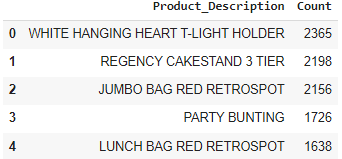
7. Top 5 products peoples are cancellinig repeatedly.

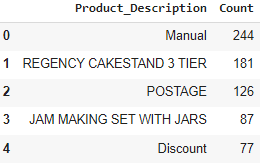

8. We have found that the number of Quantities ordered ,cancelled and net ordered quantity by different customer by which we get to know the behaviour of each customer how much they are interested in buying the quantity whether they are loyal customer or not.

9. Here we have founded hat in 2010 the quantity ordered occurs in the month of December only and in year 2011 the quantity ordered occurs almost in every month.
10. Here we have founded that same product are available at different per unit price.
11. The 'Manual'(38970.00 per unit) and 'Amazon Fee' (17836.00 per unit)are the top costlier product.
12. The 'Pads to Match all Cushions'(0.001 per unit) are the cheapest quantity.
13.  We have found that the net quantity ordered is maximum in the Afternoon time following Morning then Evening and no net quantity is ordered in Night.






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar plot of top five customer who has ordered maximum quantity.

In [ ]:
# Here we are defining a function to represent bar plot in
def with_percent (plot , feature):
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:  
      ax.text(i.get_x() -.01, i.get_height() + 0.5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()

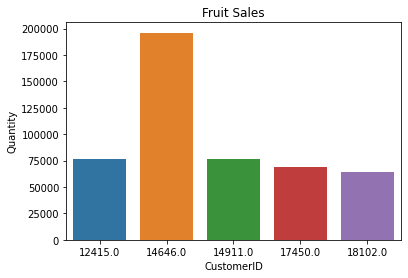

In [ ]:
top_5=df.groupby(['CustomerID'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ).head()
# create a bar plot
sns.barplot(x='CustomerID', y='Quantity', data=top_5)

# set the plot title
plt.title('Fruit Sales')

# show the plot
plt.show()








##### 1. Why did you pick the specific chart?

Here we have used bar plot because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here we have the top 5 customer id who is ordering maximum quantity.The customer ID 14646 has ordering maximum quantity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insights are very helpful in positive business growth because by this the retailer will get an knowledge which cusstomer is ordering most of the Quantity.  

#### Chart - 2-Bar plot of top 5 product customers are ordering repeatedly.

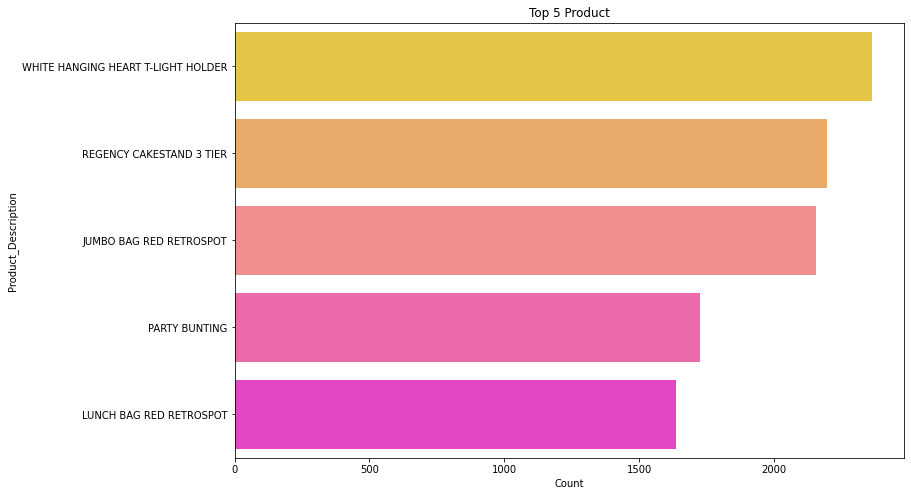

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12,8))
plt.title('Top 5 Product')
sns.barplot(x='Count',y='Product_Description',data=Description_count[:5], palette='spring_r');

##### 1. Why did you pick the specific chart?

Here we have used bar plot because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that top 5 products the customers are ordering repeatedly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insights are very helpful in positive business growth because it helps the retailer to manage the stock of the product which is in high demand.

#### Chart - 3

<AxesSubplot:title={'center':'top country'}, xlabel='Country_Name', ylabel='Count'>

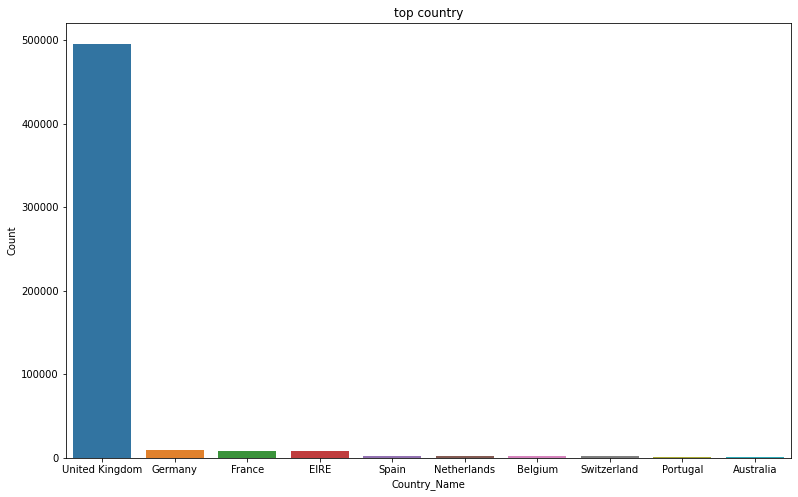

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(13,8))
plt.title('top country')
sns.barplot(x='Country_Name',y='Count',data=country_count.head(10))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4-Bar plot of top 5 stock code are in high demand

<AxesSubplot:title={'center':'top 5 stock'}, xlabel='StockCode', ylabel='Quantity'>

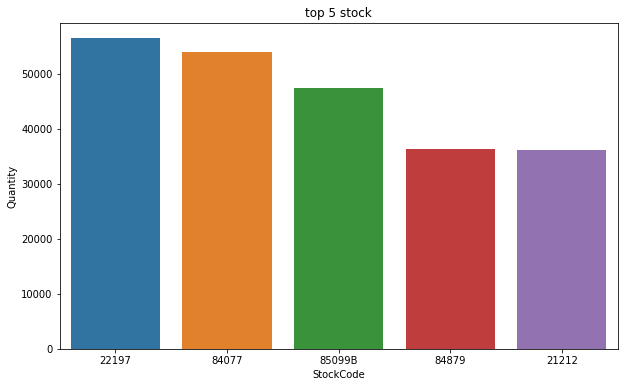

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
plt.title('top 5 stock')
sns.barplot(x='StockCode',y='Quantity',data=top_selling_stock.head(5))


##### 1. Why did you pick the specific chart?

Here we have used bar plot because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that top 5 stock code which are in high demand.
1. 22197
2. 84077
3. 85099B
4. 84879
5. 21212

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insights are very helpful in maintaing the stock of the retailer so it leads to posititve business growth.

#### Chart - 5 Monthy ordered quantity in the year 2010 and 2011

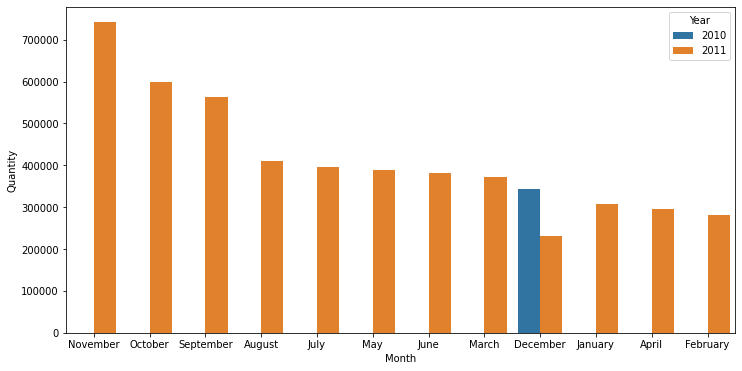

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(12,6))
ax=sns.barplot(x=month_sale['Month'], y=month_sale['Quantity'],hue=month_sale['Year'])
plt.show()

##### 1. Why did you pick the specific chart?

Here we have used sub bar plots because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here by seeing the above plot we can see that in  the year 2010 the quantity is ordered only in the month of december while in 2011 the quantity is ordered almost every month of the year.In 2011 the maximum quantity is ordered in the month of November and minimum quantity is ordered in the month of December.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insights leads to positive business growth because it helps the retailer in which month demand of quantity is high and on the basis of that he can manage the future stock of the product so that he cannot run out of stock.

#### Chart - 6 Busiest Day of the Week (Bivariate)

Text(0, 0.5, 'Number of Customers')

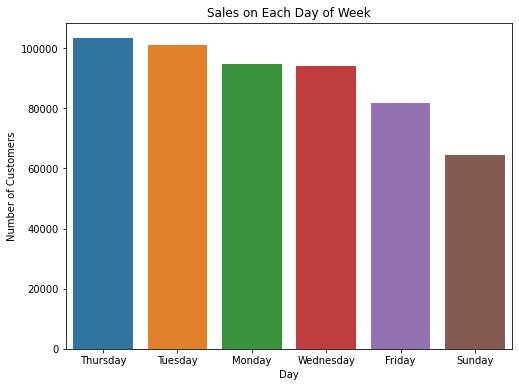

In [ ]:
# Chart - 6 visualization code
# Find the busiest day of the week using the groupby operation using the day and Invoice number
busiest_date=df.groupby('Day')['InvoiceNo'].count().sort_values(ascending=False).reset_index()
# visualization code
# busiest_date.plot(kind='bar')
plt.figure(figsize=(8,6))
sns.barplot(x=busiest_date['Day'], y=busiest_date['InvoiceNo'])
plt.title('Sales on Each Day of Week')
plt.ylabel('Number of Customers')

##### 1. Why did you pick the specific chart?

Here we have used bar plot because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

The stores are getting high traffic on Thursday followed by Tuesday, and least traffic on sunday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will definitely help to create positive impact.

#### Chart - 7 Busiest month of the Year (Bivariate)

Text(0.5, 1.0, 'Busiest Months')

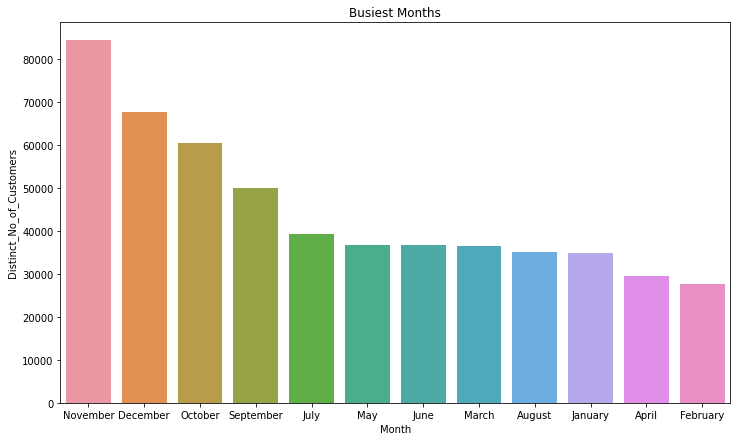

In [ ]:
# Chart - 7 visualization code
busiest_months=df.groupby('Month')['InvoiceNo'].count().sort_values(ascending=False).reset_index().rename(columns={'InvoiceNo': 'Distinct_No_of_Customers'})
plt.figure(figsize=(12,7))
sns.barplot(x=busiest_months['Month'],y=busiest_months['Distinct_No_of_Customers'])
plt.title('Busiest Months')

##### 1. Why did you pick the specific chart?

Here we have used bar plot to commpare the total number of invoice number in each month so that we can easily find out the busiest month.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clear that the busiest month is November, and least busiest month is February.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will lead us in creating positive business impact.

#### Chart - 8 Line Maker plot considering the quantities sold with respect to the InvoiceDate (Bivariate)

In [ ]:
# Chart 8 visualisation code
date_wise_sales = df[(df['Quantity'] > 0) & (df['Quantity'] < 40000) ].groupby('InvoiceDate')['Quantity'].sum().reset_index()
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=date_wise_sales['InvoiceDate'], y=date_wise_sales['Quantity'],
                    mode='lines+markers',
                    name='actual'))
fig.update_layout(title='Quantity ordered over Time',
                   xaxis_title='Date',
                   yaxis_title='Quantity Ordered')
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#Doubt

#### Chart - 9 Most Frequent Customers considering the customerID and  number of unique InvoiceNo(Bivariate) that is generated for particular customer ID

In [ ]:
frequent_customers=df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
frequent_customers

CustomerID
14911.0    248
12748.0    223
17841.0    169
14606.0    128
13089.0    118
          ... 
13441.0      1
13449.0      1
15744.0      1
14518.0      1
15076.0      1
Name: InvoiceNo, Length: 4371, dtype: int64

Text(0, 0.5, 'Distinct Number of Invoices')

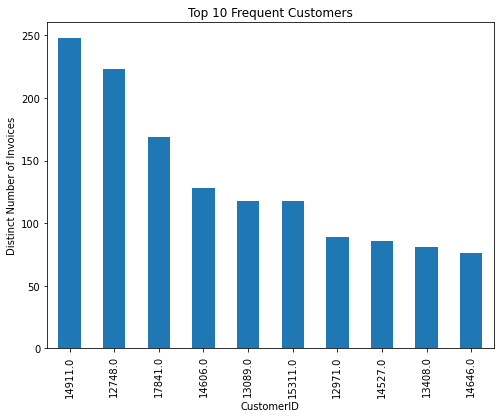

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(8,6))
frequent_customers.head(10).plot(kind='bar')
plt.title('Top 10 Frequent Customers')
plt.ylabel('Distinct Number of Invoices')

##### 1. Why did you pick the specific chart?

To find the most frequent customers.

##### 2. What is/are the insight(s) found from the chart?

We found out that the most frequent customer is 17841 followed by 14911.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight from the above bar plot will help us recognize the valued customers. And this will help us create a positive business impact.

#### Chart - 10 Highest number of Quantities Purchased by top 5 Countries (Bivariate)

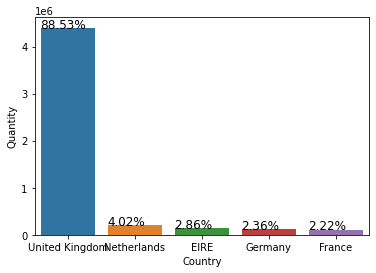

In [ ]:
# Chart - 10 visualization code
quantities_purchased_by_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index().head(5)
ax = sns.barplot(x=quantities_purchased_by_countries['Country'], y=quantities_purchased_by_countries['Quantity'])
  #now here trying to show percentage at bar plot
totals = []
for i in ax.patches:
    totals.append(i.get_height())
    total = sum(totals)

for i in ax.patches:  
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)


plt.show()

##### 1. Why did you pick the specific chart?

To find out the countries which has higher purchasing power.

##### 2. What is/are the insight(s) found from the chart?

As per the gained insight, United Kingdom has the highest purchasing power followed by Netherlands in the given stores.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As per the above insights, we can work on increasing the number of stores in countries where selling is comparatively less. And it will help us to create the positive business impact.

#### Chart - 11 Busiest Hours considering the Quantities Sold

<AxesSubplot:xlabel='Hour', ylabel='Quantity'>

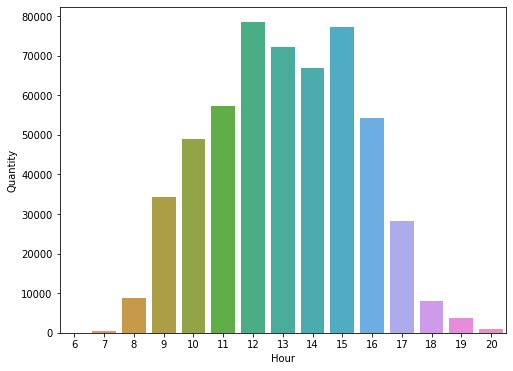

In [ ]:
# Chart - 10 visualization code
busiest_hours = df.groupby('Hour')['Quantity'].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x=busiest_hours['Hour'],y=busiest_hours['Quantity'])

##### 1. Why did you pick the specific chart?

Here we have used bar plot to compare sales of each hour of the day.

##### 2. What is/are the insight(s) found from the chart?

The busiest hours ranges from **10:00 AM to 4:00 PM**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight help us to identify the busiest hours, and we can arrange for the man power and products accordingly.

#### Chart - 12 Distribution Plot for the Numerical Columns

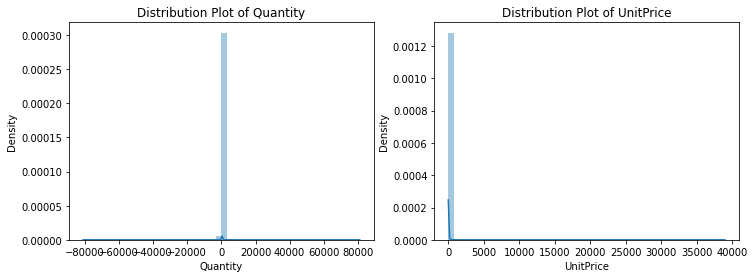

In [ ]:
# Chart - 12 visualization code
cols = ['Quantity', 'UnitPrice']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for i, col in enumerate(cols):
    sns.distplot(df[col].dropna(), ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution Plot of {col}')
    
plt.show()

##### 1. Why did you pick the specific chart?

To check the skewness in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The quantity column shows both positive and negative skewness in the data. Whereas, the UnitPrice column indicates the highly positive skewness.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart shows there is high number of canceled items in our dataset. So, we can investigate the causes of high number of cancellations. And this will help to create a positive business impact.

#### Chart - 13

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

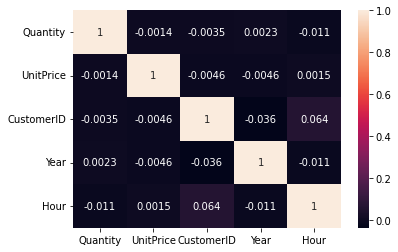

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(),annot=True)

##### 1. Why did you pick the specific chart?

To find the correlation between the numerical features.

##### 2. What is/are the insight(s) found from the chart?

Hence, we know that 1 denotes the high positive correlation, and -1 shows high negative correlation.

From the above heatmap, we can say that the features are independent to each other.

#### Chart - 15 - Pair Plot 

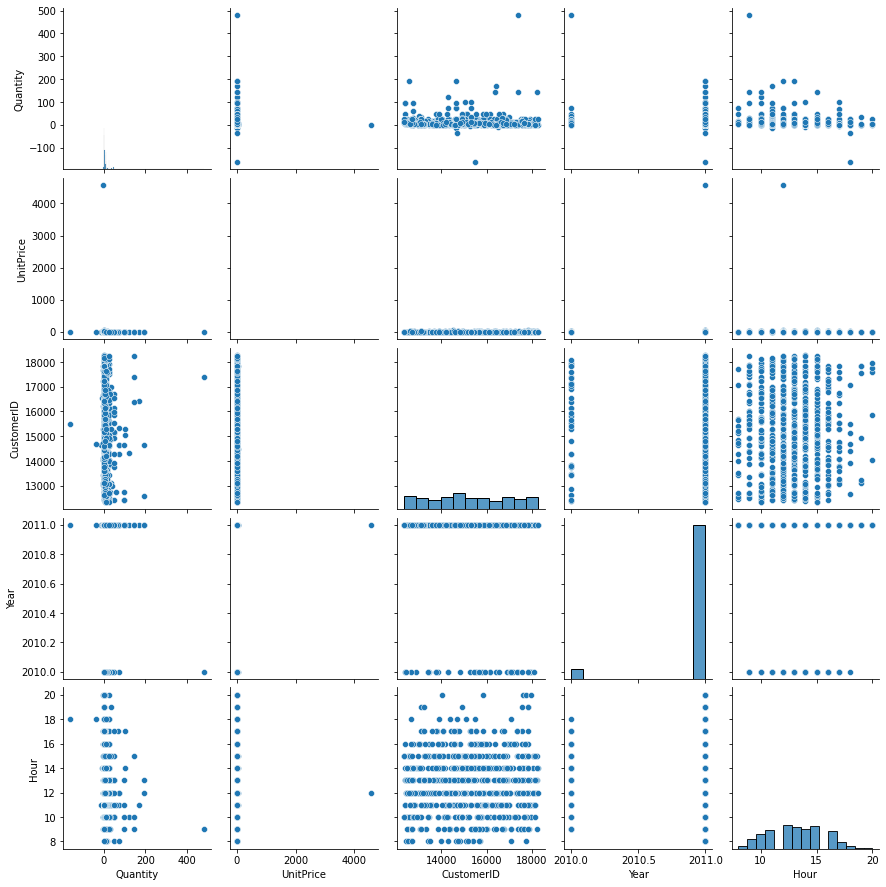

In [ ]:
# Pair Plot visualization code
# Select a representative sample of the data
sample_size = 1000
df_sample = df.sample(n=sample_size)

# Create the pairplot
sns.pairplot(df_sample)

##### 1. Why did you pick the specific chart?

To find the positive or negative correlation between the features using the scatterplots.

##### 2. What is/are the insight(s) found from the chart?

The above pairplot shows that the features are independent to each other because there is no correlation between the features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(np.sum(df.isnull()), "\n")
print("Percentage of customers id missing: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132603
Country             0
Day                 0
Month               0
Year                0
Time                0
Hour                0
dtype: int64 

Percentage of customers id missing:  24.58 %


here missing value are 25% of whole data so we cant remove them from our data  set

In [ ]:
# Create a variable 'cancelled_orders' to store all the rows in 'retail_df' where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Time,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Wednesday,December,2010,09:41:00,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Wednesday,December,2010,09:49:00,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,December,2010,10:24:00,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Wednesday,December,2010,10:24:00,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Wednesday,December,2010,10:24:00,10


it looks like negative quantity related to the cancel order

In [ ]:
#finding total cancel order
print("Percentage of cancel order: ", round(len(cancelled_orders) * 100 / df['InvoiceNo'].nunique(),2),"%" )

Percentage of cancel order:  39.03 %


In [ ]:
df2=df.copy()

In [ ]:
df.shape

(539392, 13)

In [ ]:
# Filter the copied dataframe to only include rows where the 'Quantity' column is greater than 0
df2 = df2[df2['Quantity'] > 0]

# Check the shape of the filtered dataframe
print("Number of rows:", df2.shape[0], "Number of columns:", df2.shape[1])

Number of rows: 530104 Number of columns: 13


In [ ]:
#checking whether we are right
cancelled_orders = df2[df2['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Time,Hour


In [ ]:
# Remove all rows with missing values in the CustomerID
#df2.dropna(subset=['CustomerID'], how='all', inplace=True)
#(397884, 11)
# the shape of the updated dataframe
#dropping null values
df2.dropna(inplace=True)
print(df2.shape)

(397884, 13)


In [ ]:
print(np.sum(df2.isnull()), "\n")

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Day            0
Month          0
Year           0
Time           0
Hour           0
dtype: int64 



#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

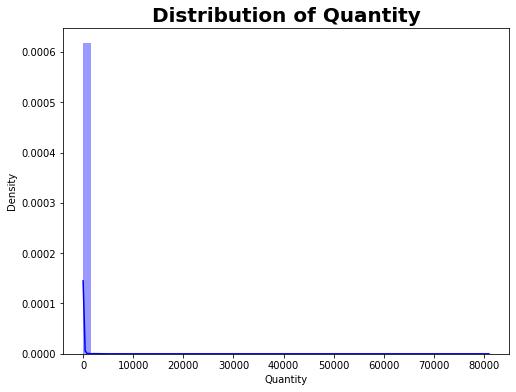

In [ ]:
#Distribution of Quantity
# Set the figure size for the plot
plt.figure(figsize=(8,6))
# Set the plot title
plt.title('Distribution of Quantity', size=20, fontweight='bold')

# Plot the distribution of Quantity data
sns.distplot(df2['Quantity'], color='blue')

# Display the plot
plt.show()

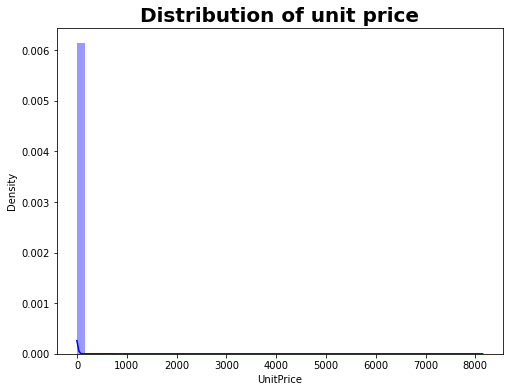

In [ ]:
#Distribution of unit price
# Set the figure size for the plot
plt.figure(figsize=(8,6))
# Set the plot title
plt.title('Distribution of unit price', size=20, fontweight='bold')

# Plot the distribution of Quantity data
sns.distplot(df2['UnitPrice'], color='blue')

# Display the plot
plt.show()

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
df2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Time,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,08:26:00,8


In [ ]:
# create a new column 'total_cost' in the dataframe
df2['total_cost'] = df2['Quantity'] * df2['UnitPrice']

In [ ]:
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Time,Hour,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,08:26:00,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,08:26:00,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,08:26:00,8,22.00


**Recency,Frequency and Monetary analysis**

In [ ]:
# Import the datetime module as "dt" for easier use
import time
import datetime as dt

In [ ]:
# Getting the latest value of the 'InvoiceDate' column
latest_date = df2['InvoiceDate'].max()

# Output the result
print(latest_date)

2011-12-09 12:50:00


In [ ]:
# Calculate recency
recency_df = df2.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['recency'] = (latest_date - recency_df['InvoiceDate']).dt.days

In [ ]:
# Calculate frequency
frequency_df = df2.groupby('CustomerID')['InvoiceDate'].count().reset_index()
frequency_df = frequency_df.rename(columns={'InvoiceDate': 'frequency'})

In [ ]:
# Calculate monetary
monetary_df = df2.groupby('CustomerID')['total_cost'].sum().reset_index()
monetary_df.rename(columns={'total_cost': 'Monetary'}, inplace=True)

In [ ]:
# Combine the RFM values into a single dataframe
rfm_df = pd.merge(recency_df, frequency_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetary_df, on='CustomerID')

In [ ]:
rfm_df.head(5)

,CustomerID,InvoiceDate,recency,frequency,Monetary
0,12346.0,2011-01-18 10:01:00,325,1,77183.60
1,12347.0,2011-12-07 15:52:00,1,182,4310.00
2,12348.0,2011-09-25 13:13:00,74,31,1797.24
3,12349.0,2011-11-21 09:51:00,18,73,1757.55
4,12350.0,2011-02-02 16:01:00,309,17,334.40


In [ ]:
# Define the quartile cutoffs
quartiles = rfm_df[['recency', 'frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

# Assign scores to each value based on quartile cutoffs
def r_score(x, c):
    if x <= c[0.25]:
        return 1
    elif x <= c[0.5]:
        return 2
    elif x <= c[0.75]: 
        return 3
    else:
        return 4

In [ ]:
def fm_score(x, c):
    if x <= c[0.25]:
        return 4
    elif x <= c[0.5]:
        return 3
    elif x <= c[0.75]: 
        return 2
    else:
        return 1

In [ ]:
rfm_df['r_score'] = rfm_df['recency'].apply(r_score, c=quartiles['recency'])
rfm_df['f_score'] = rfm_df['frequency'].apply(fm_score, c=quartiles['frequency'])
rfm_df['m_score'] = rfm_df['Monetary'].apply(fm_score, c=quartiles['Monetary'])

In [ ]:
rfm_df.head(5)

,CustomerID,InvoiceDate,recency,frequency,Monetary,r_score,f_score,m_score
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,4,4,1
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,1,1,1
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,3,3,1
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,2,2,1
4,12350.0,2011-02-02 16:01:00,309,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.r_score.map(str) + rfm_df.f_score.map(str) + rfm_df.m_score.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['r_score', 'f_score', 'm_score']].sum(axis = 1)
rfm_df.head()

,CustomerID,InvoiceDate,recency,frequency,Monetary,r_score,f_score,m_score,RFMGroup,RFMScore
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,4,4,1,441,9
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,1,1,1,111,3
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,3,3,1,331,7
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,2,2,1,221,5
4,12350.0,2011-02-02 16:01:00,309,17,334.40,4,4,3,443,11


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

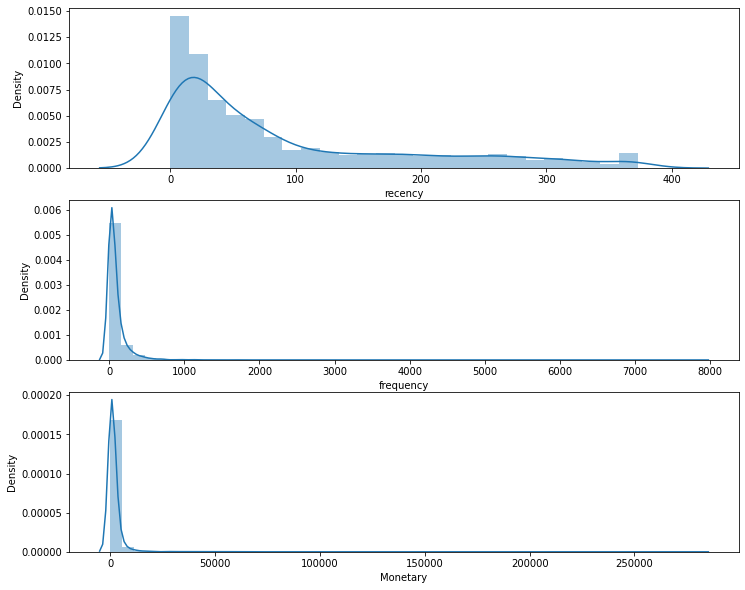

In [ ]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'])

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
from sklearn import preprocessing
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['recency'] = [handle_neg_n_zero(x) for x in rfm_df.recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]


In [ ]:
#appkying log transformation
rfm_df['recency_log'] = rfm_df['recency'].apply(math.log)
rfm_df['frequency_log'] = rfm_df['frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

<AxesSubplot:xlabel='Monetary_log', ylabel='Density'>

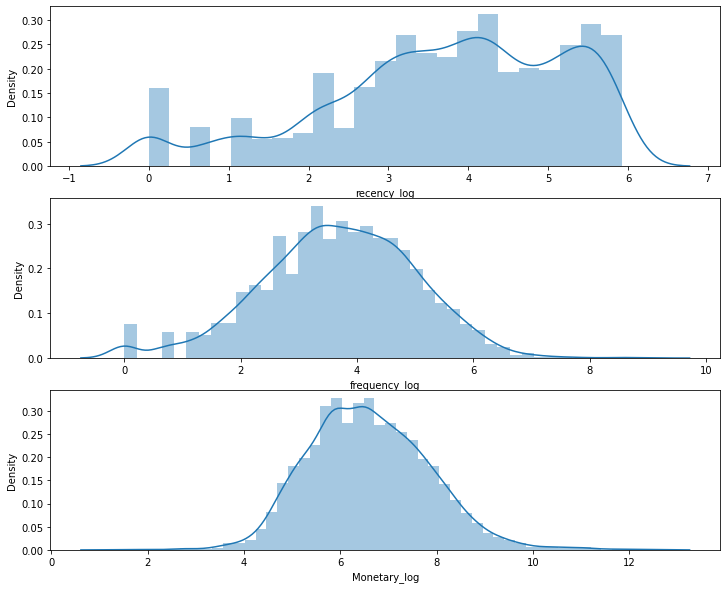

In [ ]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency_log'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency_log'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary_log'])

In [ ]:
rfm_df.head(5)

,CustomerID,InvoiceDate,recency,frequency,Monetary,r_score,f_score,m_score,RFMGroup,RFMScore,recency_log,frequency_log,Monetary_log
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,1,1,1,111,3,0.000000,5.204007,8.368693
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,3,3,1,331,7,4.304065,3.433987,7.494007
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676
4,12350.0,2011-02-02 16:01:00,309,17,334.40,4,4,3,443,11,5.733341,2.833213,5.812338


### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling your data
# Define the features to use for K-means
columns = ['recency_log', 'frequency_log', 'Monetary_log']

# Standardize the feature values
scaler = StandardScaler()
rfm_df[columns] = scaler.fit_transform(rfm_df[columns].values)

In [ ]:
rfm_df.head(5)

,CustomerID,InvoiceDate,recency,frequency,Monetary,r_score,f_score,m_score,RFMGroup,RFMScore,recency_log,frequency_log,Monetary_log
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,4,4,1,441,9,1.373353,-2.775160,3.698719
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,1,1,1,111,3,-2.451384,1.149549,1.410201
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,3,3,1,331,7,0.394815,-0.185347,0.716419
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,2,2,1,221,5,-0.540035,0.460579,0.698706
4,12350.0,2011-02-02 16:01:00,309,17,334.40,4,4,3,443,11,1.339969,-0.638433,-0.617446


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1-K-Means Clustering

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [ ]:
rfm_df.isna().sum()

CustomerID       0
InvoiceDate      0
recency          0
frequency        0
Monetary         0
r_score          0
f_score          0
m_score          0
RFMGroup         0
RFMScore         0
recency_log      0
frequency_log    0
Monetary_log     0
dtype: int64

 #### 1.Applying Silhouette Score Method on Recency frequency and Monetary

In [ ]:
#assigning features
features_rec_mon=['recency_log','Monetary_log', 'frequency_log']
X=rfm_df[features_rec_mon]

In [ ]:
from typing import Tuple
def cluster_eval_score(X: pd.DataFrame, range_n_clusters: Tuple[int, int]) -> pd.DataFrame:
    """
    This function evaluates the silhouette score for different numbers of clusters using KMeans.

    Parameters:
    X (pandas DataFrame): Input data.
    range_n_clusters (tuple): Range of numbers of clusters to evaluate.

    Returns:
    eval_score (pandas DataFrame): DataFrame containing the silhouette score for each number of clusters.
    """

    eval_score = pd.DataFrame(columns=['n_clusters', 'silhouette_score'])

    for n_clusters in range(range_n_clusters[0], range_n_clusters[1]+1):
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_

        score = silhouette_score(X, preds)
        eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    return eval_score


In [ ]:
eval_score = cluster_eval_score(X, (2, 15))


For n_clusters = 2, silhouette score is 0.39529382107415195
For n_clusters = 3, silhouette score is 0.30653019436946166
For n_clusters = 4, silhouette score is 0.30464630629201506
For n_clusters = 5, silhouette score is 0.2798029505194397
For n_clusters = 6, silhouette score is 0.27882868299274843
For n_clusters = 7, silhouette score is 0.2685453212600486
For n_clusters = 8, silhouette score is 0.2671211285390758
For n_clusters = 9, silhouette score is 0.2535079920523828
For n_clusters = 10, silhouette score is 0.26029841757220706
For n_clusters = 11, silhouette score is 0.25874329659665
For n_clusters = 12, silhouette score is 0.2651480148559945
For n_clusters = 13, silhouette score is 0.2639774211672225
For n_clusters = 14, silhouette score is 0.26226839594264106
For n_clusters = 15, silhouette score is 0.2559857141019251


In [ ]:
eval_score.columns = ['n_clusters', 's_score']
eval_score = eval_score.reset_index(drop = False)
eval_score.head()

,index,n_clusters,s_score
0,0,2.0,0.395294
1,1,3.0,0.306530
2,2,4.0,0.304646
3,3,5.0,0.279803
4,4,6.0,0.278829


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<AxesSubplot:xlabel='n_clusters', ylabel='s_score'>

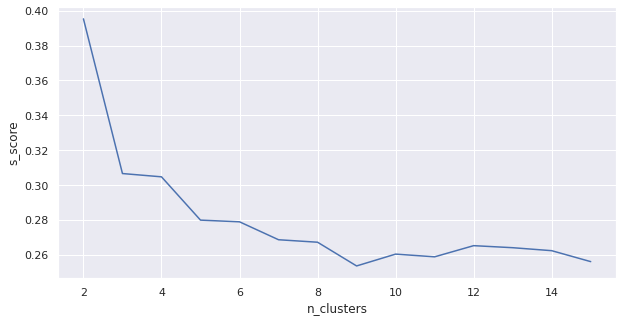

In [ ]:
plt.figure(figsize= (10,5))
sns.lineplot(data = eval_score, x = 'n_clusters', y= 's_score')

 #### 2.Applying Silhouette Score Method on Recency and monetary

In [ ]:
features_rec_mon=['recency_log','Monetary_log']
X1=rfm_df[features_rec_mon]

In [ ]:
eval_score = cluster_eval_score(X1, (2, 15))


For n_clusters = 2, silhouette score is 0.42177946707022224
For n_clusters = 3, silhouette score is 0.3499126097274528
For n_clusters = 4, silhouette score is 0.36620436780368737
For n_clusters = 5, silhouette score is 0.33786922436118705
For n_clusters = 6, silhouette score is 0.34500532408164286
For n_clusters = 7, silhouette score is 0.34840953323587004
For n_clusters = 8, silhouette score is 0.33943791761160613
For n_clusters = 9, silhouette score is 0.3450023861019088
For n_clusters = 10, silhouette score is 0.34681931220994183
For n_clusters = 11, silhouette score is 0.338680861049206
For n_clusters = 12, silhouette score is 0.34489128914327427
For n_clusters = 13, silhouette score is 0.3374702883616695
For n_clusters = 14, silhouette score is 0.3480234297851905
For n_clusters = 15, silhouette score is 0.33541545097516023


 #### 3.Applying Silhouette Score Method on frequency and Monetary

In [ ]:
features_rec_mon=['frequency_log','Monetary_log']
X2=rfm_df[features_rec_mon]

In [ ]:
eval_score = cluster_eval_score(X2, (2, 15))


For n_clusters = 2, silhouette score is 0.47852283918959493
For n_clusters = 3, silhouette score is 0.40764120562174433
For n_clusters = 4, silhouette score is 0.3712567840682045
For n_clusters = 5, silhouette score is 0.3432880958789704
For n_clusters = 6, silhouette score is 0.35833457762170373
For n_clusters = 7, silhouette score is 0.3420770408348775
For n_clusters = 8, silhouette score is 0.34618792306938206
For n_clusters = 9, silhouette score is 0.34361905638122864
For n_clusters = 10, silhouette score is 0.3610846555336696
For n_clusters = 11, silhouette score is 0.3680955208084119
For n_clusters = 12, silhouette score is 0.3547963719095616
For n_clusters = 13, silhouette score is 0.3642775563488023
For n_clusters = 14, silhouette score is 0.3671180319835412
For n_clusters = 15, silhouette score is 0.36042073317507795


In [ ]:
from typing import Tuple
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def cluster_eval_score(X: pd.DataFrame, range_n_clusters: Tuple[int, int]) -> pd.DataFrame:
    """
    This function evaluates the silhouette score for different numbers of clusters using KMeans.

    Parameters:
    X (pandas DataFrame): Input data.
    range_n_clusters (tuple): Range of numbers of clusters to evaluate.

    Returns:
    eval_score (pandas DataFrame): DataFrame containing the silhouette score for each number of clusters.
    """

    eval_score = pd.DataFrame(columns=['n_clusters', 'silhouette_score'])

    for n_clusters in range(range_n_clusters[0], range_n_clusters[1]+1):
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_

        score = silhouette_score(X, preds)
        eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

        # Plot scatter plot of the clusters
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 6)
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=preds, cmap=plt.cm.nipy_spectral)
        ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=200,
                    linewidths=3, color='black', zorder=10)
        ax.set_title("KMeans Clustering with {} Clusters".format(n_clusters))
        plt.show()

    return eval_score


For n_clusters = 2, silhouette score is 0.47853570950660274


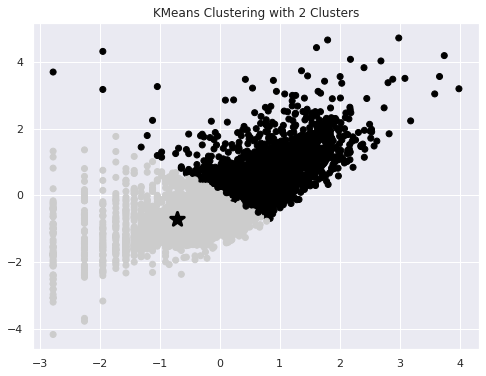

For n_clusters = 3, silhouette score is 0.4076190810117215


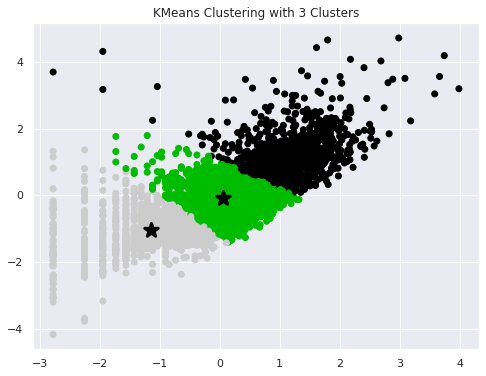

For n_clusters = 4, silhouette score is 0.37116120145360926


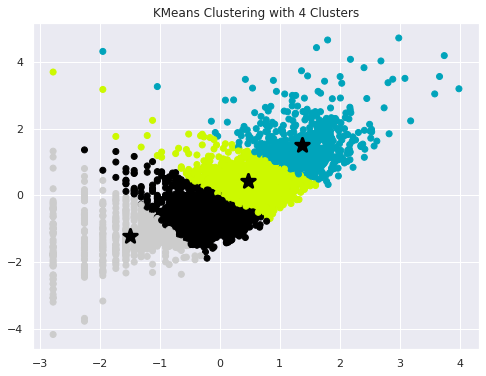

For n_clusters = 5, silhouette score is 0.34398758570296545


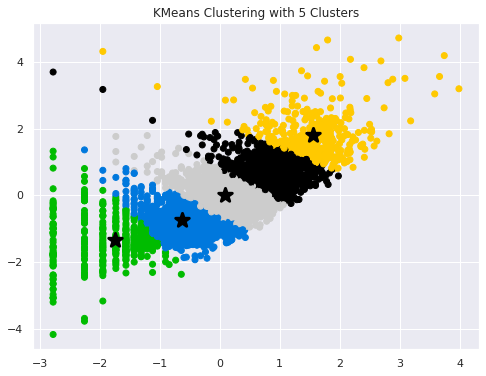

For n_clusters = 6, silhouette score is 0.35868292199473845


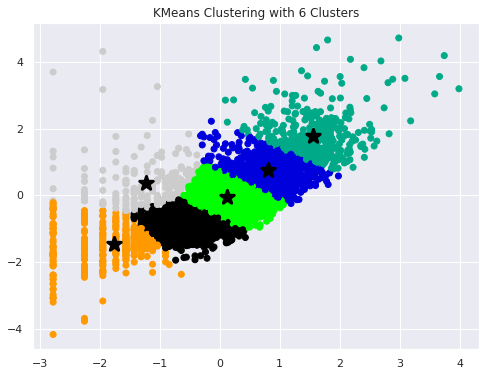

For n_clusters = 7, silhouette score is 0.3385672081321095


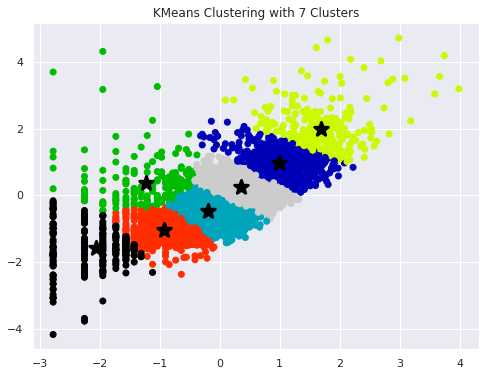

For n_clusters = 8, silhouette score is 0.3508337509401182


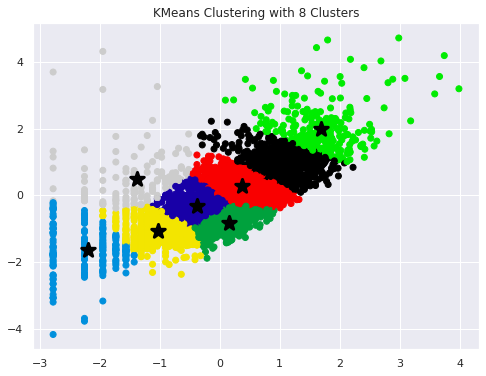

For n_clusters = 9, silhouette score is 0.34482835109481935


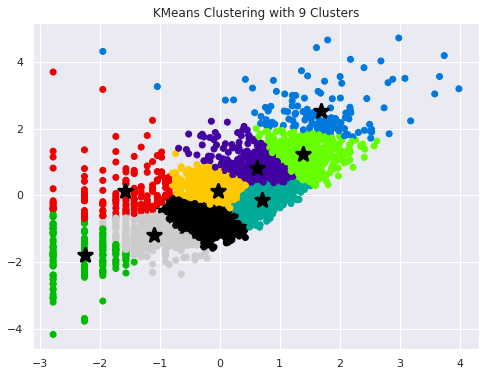

For n_clusters = 10, silhouette score is 0.353791483118745


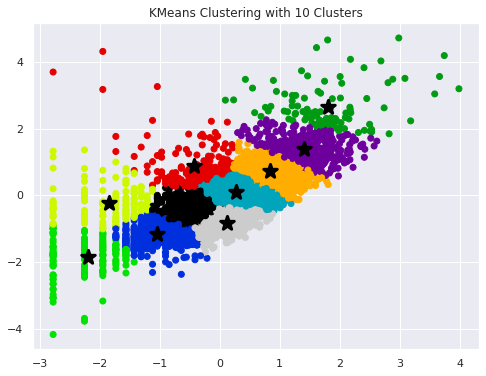

For n_clusters = 11, silhouette score is 0.3429378282507878


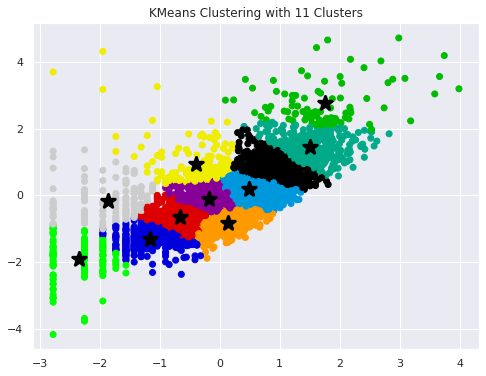

For n_clusters = 12, silhouette score is 0.3533797388918389


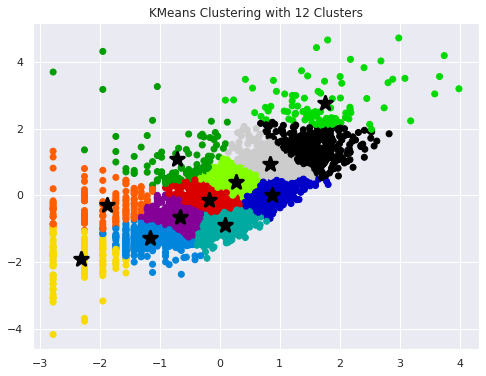

For n_clusters = 13, silhouette score is 0.36094535746039086


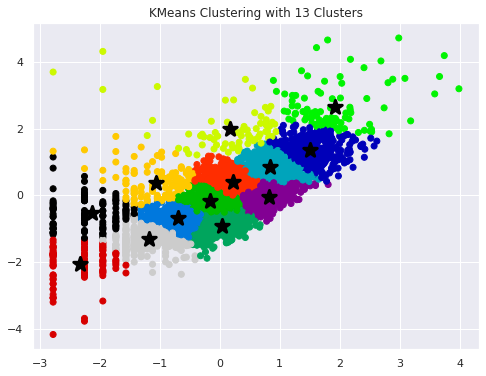

For n_clusters = 14, silhouette score is 0.3562881038766757


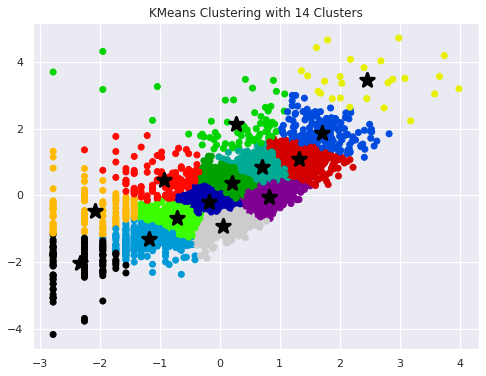

For n_clusters = 15, silhouette score is 0.3622007103806322


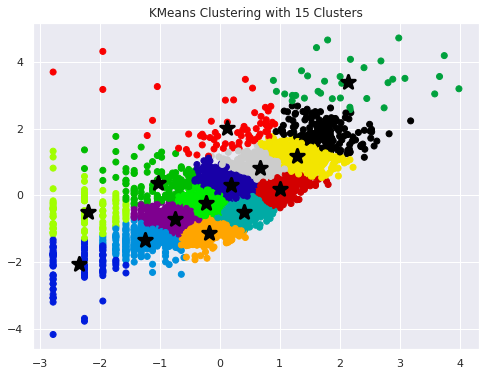

In [ ]:
eval_score = cluster_eval_score(X2, (2, 15))

#### 1. Explain the ML Model used and it's performance

K-means clustering is a popular unsupervised machine learning technique used to cluster similar data points together based on their attributes. It is an iterative algorithm that aims to minimize the sum of squared distances between each data point and its assigned cluster centroid.

The output of the algorithm is K cluster centroids and the assignment of each data point to its corresponding cluster.

K-means is a simple and efficient clustering algorithm that works well on large datasets. However, it is sensitive to the initial placement of the centroids, and the optimal number of clusters may not always be known in advance.

In our instance, we identified two optimal clusters that corresponded to high Silhoutte scores however, we can see that the cluster is not clearly separated.

### ML Model - 2-Applying Elbow Method

 #### 1.Applying Elbow Method on Recency,frequency and Monetary

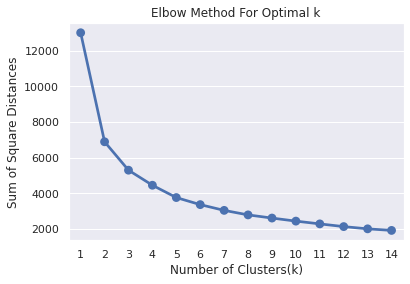

In [ ]:
#applying on  'recency_log','Monetary_log', 'frequency_log'
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
def find_optimal_k(X, max_clusters=15):
    """
    Given a data matrix X, applies the elbow method to determine the optimal number of clusters.
    
    Parameters:
    -----------
    X: numpy.ndarray or pandas.DataFrame
        The data matrix to cluster.
    max_clusters: int, optional (default=15)
        The maximum number of clusters to consider.
    
    Returns:
    --------
    int
        The optimal number of clusters as determined by the elbow method.
    """
    
    sum_of_sq_dist = {}
    
    for k in range(1, max_clusters + 1):
        km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
        km = km.fit(X)
        sum_of_sq_dist[k] = km.inertia_

    sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
    plt.xlabel('Number of Clusters(k)')
    plt.ylabel('Sum of Square Distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
    # Find the optimal number of clusters based on the elbow plot
    optimal_k = 1
    for k in range(2, max_clusters + 1):
        slope = (sum_of_sq_dist[k] - sum_of_sq_dist[k-1]) / (k - (k-1))
        if slope < 0.05 * sum_of_sq_dist[1]:
            optimal_k = k
            break
            
    return optimal_k


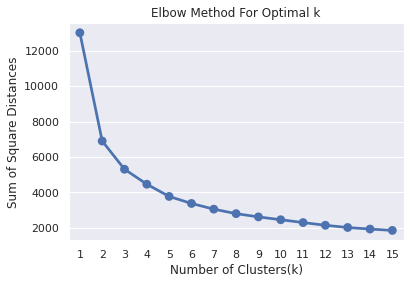

In [ ]:
optimal_k = find_optimal_k(X)


 #### 2.Applying eLBOW Score Method on Recency and Monetary

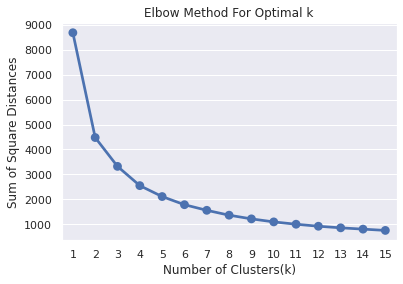

In [ ]:
#
optimal_k = find_optimal_k(X1)



 #### 3.Applying Elbow Method on frequency and Monetary

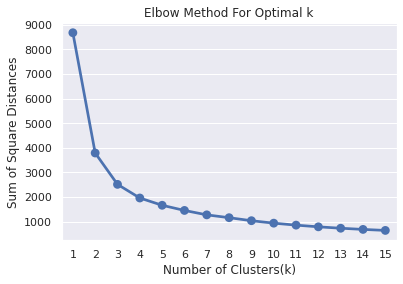

In [ ]:
#
optimal_k = find_optimal_k(X2)


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X1)
y_kmeans= km.predict(X1)

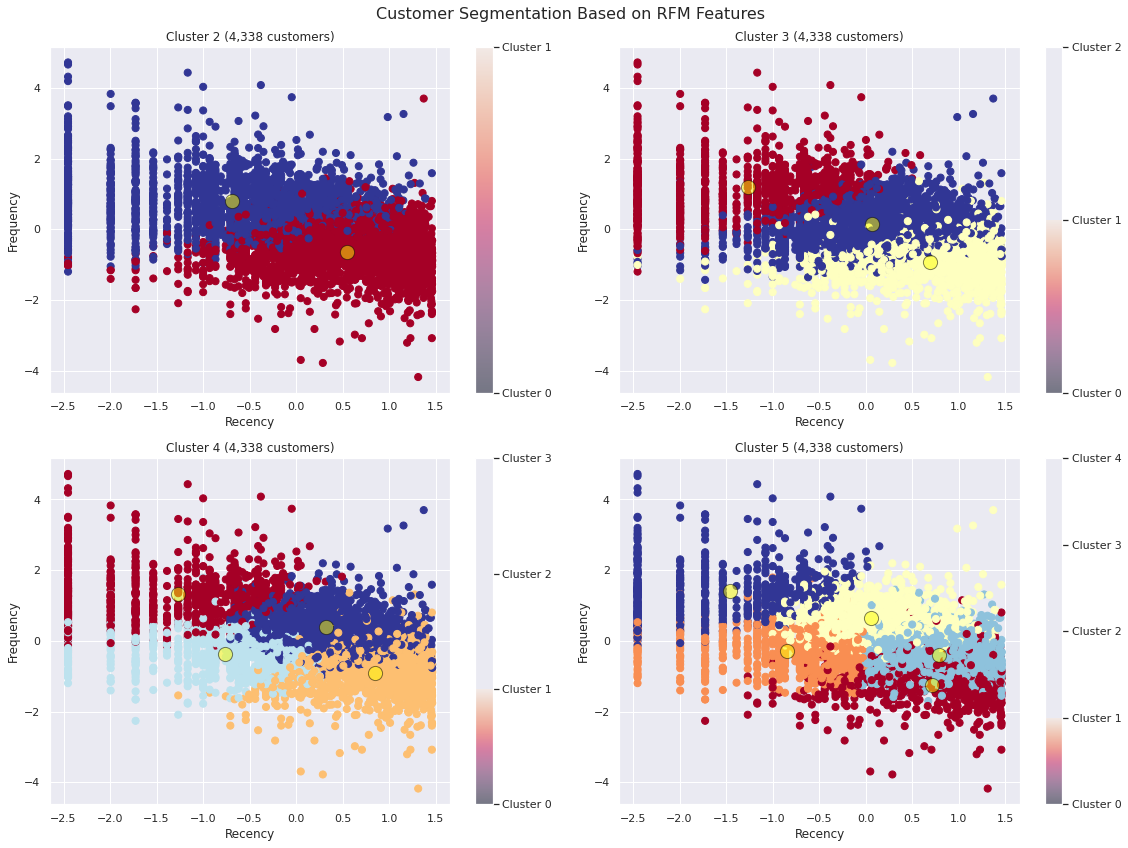

In [ ]:
# Set the figure size and title for the scatter plot
plt.figure(figsize=(16,12))
plt.suptitle('Customer Segmentation Based on RFM Features', fontsize=16)

# Create a loop to plot the scatter plot for each number of clusters
for n_clusters in range(2, 6):
    # Initialize the KMeans model with the desired number of clusters
    km = KMeans(n_clusters=n_clusters, random_state=42)
    # Fit the model to the input data X
    y_kmeans = km.fit_predict(X)
    
    # Create a subplot for the current number of clusters
    plt.subplot(2, 2, n_clusters-1)
    
    # Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')
    
    # Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
    centers = km.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')
    
    # Set the x-axis and y-axis labels
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    
    # Set the title for the current subplot
    plt.title('Cluster {} ({:,} customers)'.format(n_clusters, len(y_kmeans)))
    
    # Add a color bar to the plot to show the correspondence between the colors and the cluster labels
    color_bar = plt.colorbar()
    color_bar.set_ticks(np.unique(y_kmeans))
    color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Adjust the spacing between subplots and display the plot
plt.tight_layout()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The elbow method is a common technique used to determine the optimal number of clusters in a k-means clustering algorithm. The method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters, and selecting the number of clusters at the "elbow point" where the rate of decrease in WCSS slows down.

In our case, we have observed that the WCSS is maximum for one cluster in each cases correspoding features, which suggests that the data points are not well-separated and do not form distinct clusters. However, selecting only one cluster is not a practical solution, as it does not provide any meaningful insights or segmentation.

When we tried with two clusters, we noticed that the data points are still not well-separated, indicating that the clustering algorithm may not be suitable for this dataset.



### ML Model - 3-Applying DBSCAN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def dbscan_cluster(X, eps=0.5, min_samples=15):
    """
    Given a data matrix X, applies the DBSCAN clustering algorithm and returns the predicted labels.
    
    Parameters:
    -----------
    X: numpy.ndarray or pandas.DataFrame
        The data matrix to cluster.
    eps: float, optional (default=0.5)
        The maximum distance between two samples for them to be considered as in the same neighborhood.
    min_samples: int, optional (default=15)
        The number of samples in a neighborhood for a point to be considered as a core point.
    
    Returns:
    --------
    numpy.ndarray
        The predicted labels for each sample in X.
    """
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)

    plt.figure(figsize=(13,8))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.show()
    
    return y_pred


 #### 1.Applying DBSCAN Method on Recency,frequency and Monetary

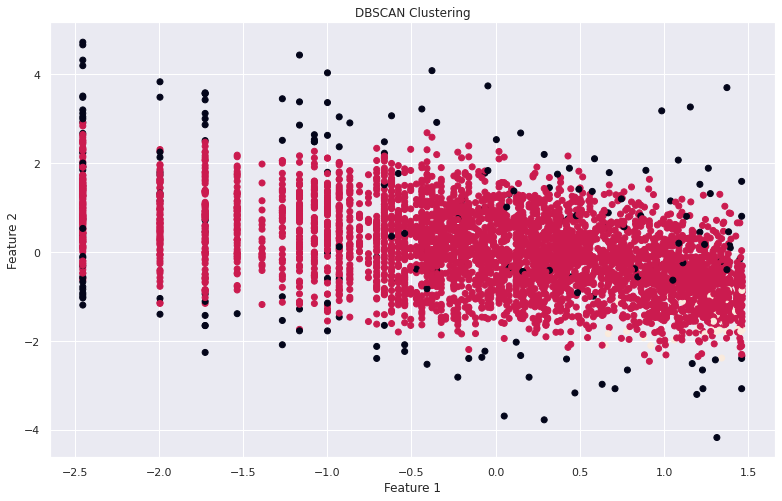

In [ ]:
y_pred = dbscan_cluster(X)


 #### 2.Applying DBSCAN Method on Recency Monetary

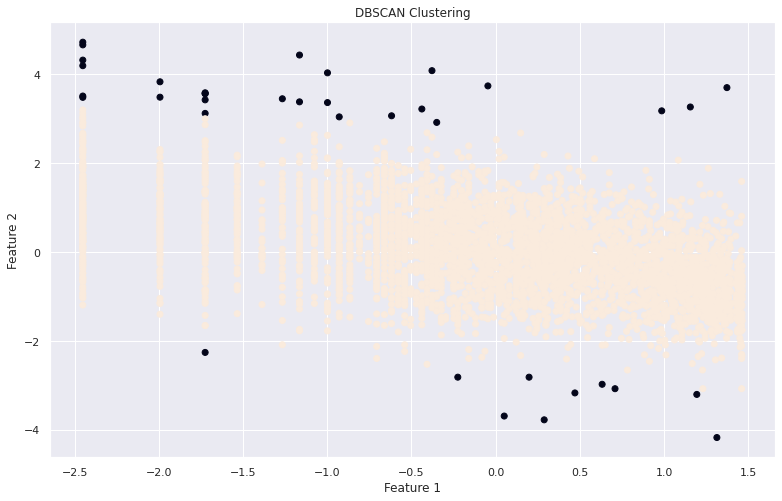

In [ ]:
y_pred = dbscan_cluster(X1)


 #### 3.Applying DBSCAN Method on Recency and frequency

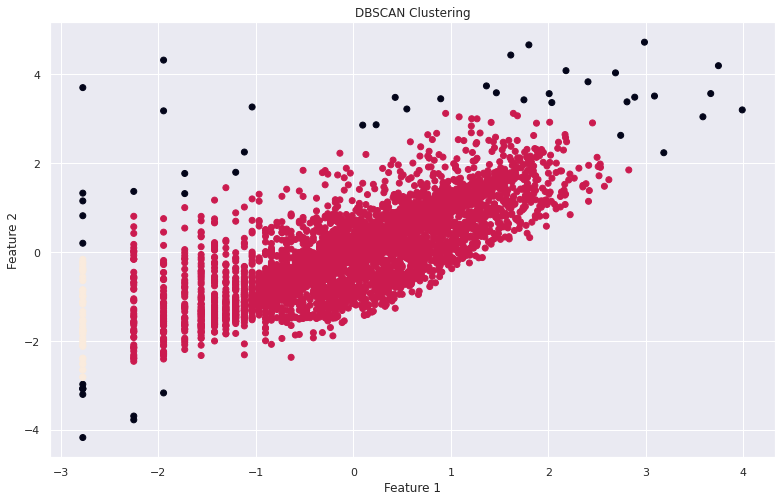

In [ ]:
y_pred = dbscan_cluster(X2)


For n_clusters=2, the average silhouette score is 0.42


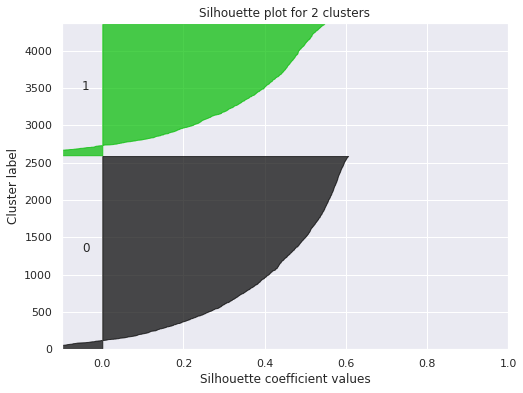

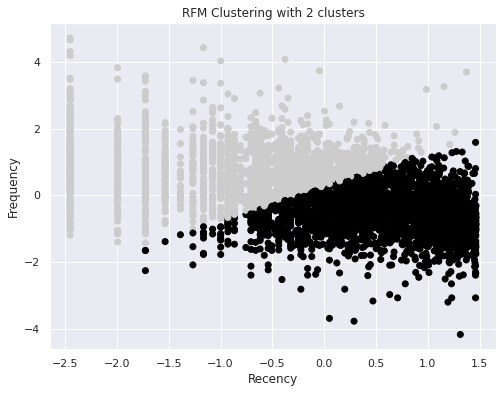

For n_clusters=3, the average silhouette score is 0.35


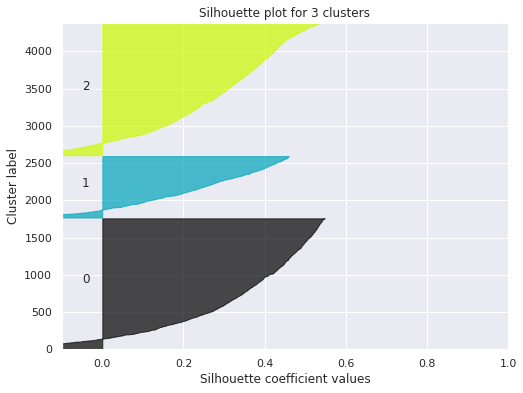

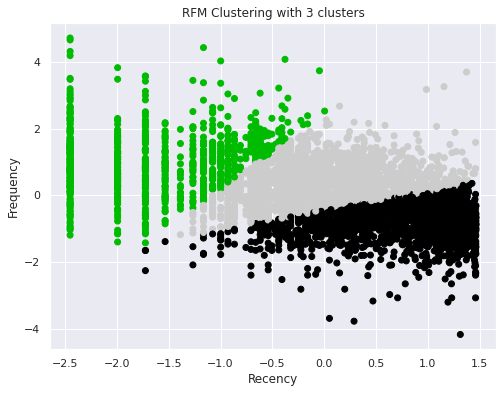

For n_clusters=4, the average silhouette score is 0.37


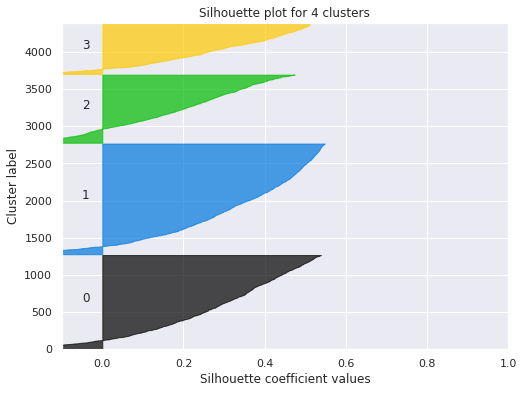

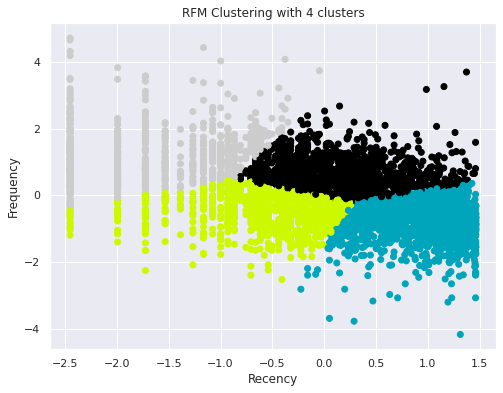

For n_clusters=5, the average silhouette score is 0.34


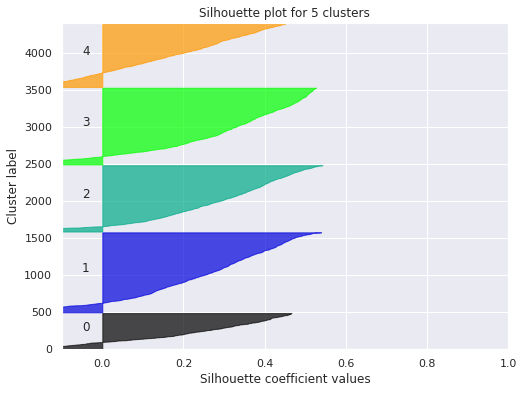

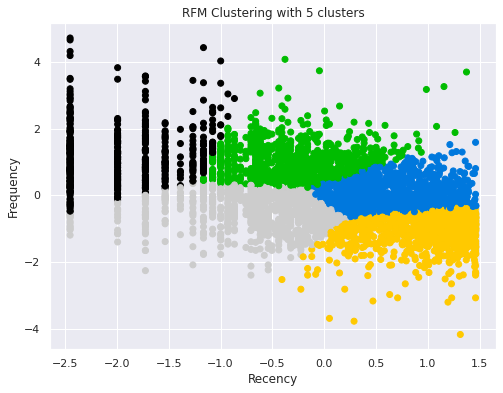

In [ ]:

# Set the number of clusters to try
n_clusters_range = range(2, 6)

# Loop over the number of clusters and generate silhouette plots
for n_clusters in n_clusters_range:
    # Initialize the k-means clustering object
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X1)
    
    # Calculate the average silhouette score for the clustering
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={n_clusters}, the average silhouette score is {silhouette_avg:.2f}")
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Plot the silhouette plot
    plt.figure(figsize=(8,6))
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X1) + (n_clusters + 1) * 10])
    y_lower = 10
    
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples in cluster j
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        
        # Compute the size of the ith cluster
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        
        # Fill in the colors for the silhouette plot
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plot with the cluster number at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    # Set the title and axis labels for the silhouette plot
    plt.title(f"Silhouette plot for {n_clusters} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

    # Display the plot
    plt.show()
    
    # Plot the scatter plot for the clustering
    plt.figure(figsize=(8,6))
    plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=cluster_labels, cmap='nipy_spectral')
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.title(f"RFM Clustering with {n_clusters} clusters")
    
    # Display the plot
    plt.show()


DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It is a popular clustering algorithm that groups together data points that are close to each other in a high-density region, while also identifying noise points that are not part of any cluster. DBSCAN works well with datasets that have irregular shapes and varying densities, and does not require a predetermined number of clusters.

The algorithm works by defining two parameters:

Epsilon (ε): the maximum distance between two points for them to be considered as part of the same cluster.
Minimum points (MinPts): the minimum number of points required to form a dense region.
The algorithm starts with an arbitrary data point and finds all its neighboring points that are within ε distance. If the number of neighboring points is greater than or equal to MinPts, then the data point is considered as part of a cluster. The algorithm then expands the cluster by finding all the neighboring points of the current point and repeating the process until no more points can be added. If a point has fewer than MinPts neighboring points, it is considered a noise point.

### ML Model - 4-Applying Hierarchy clustering

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

def plot_dendrogram(X):
    plt.figure(figsize=(13,8))
    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean Distances')
    plt.show()


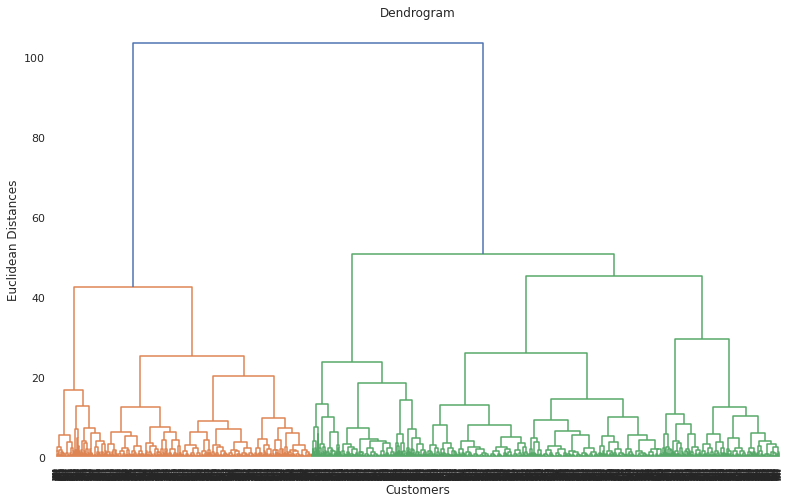

In [ ]:
plot_dendrogram(X)


#### 1. Explain the ML Model used and it's performance.

Hierarchical clustering is a popular unsupervised machine learning technique used to cluster similar data points together based on their attributes. Unlike k-means clustering, hierarchical clustering does not require the number of clusters to be specified in advance.

The algorithm works by constructing a hierarchy of clusters, starting with individual data points as their own clusters, and then successively merging clusters together based on their similarity. The result is a tree-like structure called a dendrogram, which shows the hierarchy of clusters and their relationships.

### summarizing the report of all models.

In [ ]:
from prettytable import PrettyTable 

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['2',"K-Means with silhouette_score  ", "RM", "2"])
myTable.add_row(['3',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['4',"K-Means with Elbow methos ", "RFM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['6',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['7',"DBSCAN ", "RFM", "2"])
myTable.add_row(['8',"DBSCAN ", "FM", "2"])
myTable.add_row(['9',"DBSCAN ", "RM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"Hierarchical clustering  ", "RM", "2"])

In [ ]:
print(myTable)

+--------+---------------------------------+------+---------------------------+
| Sr No. |            Model_Name           | Data | Optimal_Number_of_cluster |
+--------+---------------------------------+------+---------------------------+
|   1    |  K-Means with silhouette_score  | RFM  |             2             |
|   2    | K-Means with silhouette_score   |  RM  |             2             |
|   3    |  K-Means with silhouette_score  |  FM  |             2             |
|   4    |    K-Means with Elbow methos    | RFM  |             2             |
|   5    |   K-Means with Elbow methos     |  RM  |             2             |
|   6    |   K-Means with Elbow methos     |  FM  |             2             |
|   7    |             DBSCAN              | RFM  |             2             |
|   8    |             DBSCAN              |  FM  |             2             |
|   9    |             DBSCAN              |  RM  |             3             |
|   10   |    Hierarchical clustering   

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 DBSCAN is a powerful clustering algorithm that can handle a wide variety of data types and shapes. If it gave you the optimal clustering result, it means that it was able to effectively identify the underlying structure in your data.

 and it has identified two optimal clusters, it suggests that there are two distinct groups in your data that can be meaningfully separated and analyzed separately.

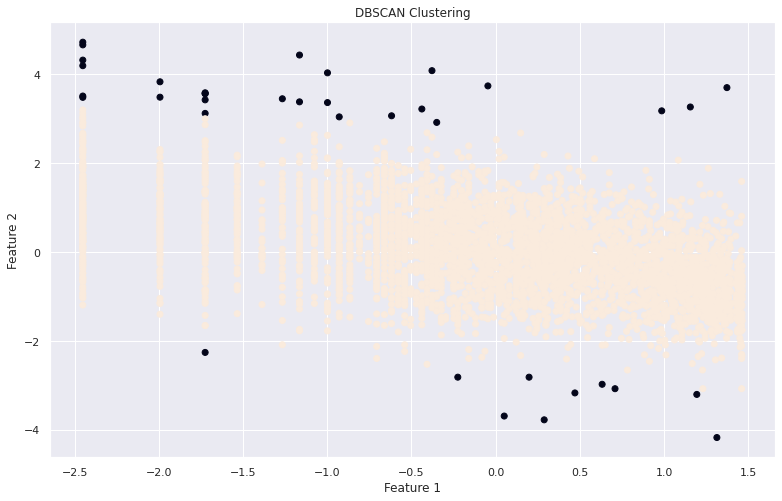

In [ ]:
y_pred = dbscan_cluster(X1)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***